# Markov Chain Monte Carlo
MCMC, mixed effect model for when grid approximation and quadratic approximation are not sufficient or too computationally intensive.

In [8]:
library(rethinking)

Loading required package: rstan

Loading required package: StanHeaders


rstan version 2.26.13 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


Loading required package: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- CmdStan path: /Users/helios/.cmdstan/cmdstan-2.30.1

- CmdStan version: 2.30.1

Loading required package: parallel

rethinking (Version 2.21)


Attaching package: ‘rethinking’


The following object is masked from ‘package:rstan’:

    stan


The following object is masked from ‘package:stats’:

    rstudent




In [2]:
n_samples <- 1000
p <- rep( NA , n_samples )
p[1] <- 0.5 # prior
W <- 6 # Water
L <- 3 # Land
for ( i in 2:n_samples ) {
    p_new <- rnorm( 1 , p[i-1] , 0.1)
    if (p_new < 0) p_new <- abs(p_new)
    if (p_new > 1) p_new <- 2 - p_new
    q0 <- dbinom(W, W+L, p[i-1])
    q1 <- dbinom(W, W+L, p_new)
    p[i] <- ifelse( runif(1) < q1/q0 , p_new , p[i-1] )
}

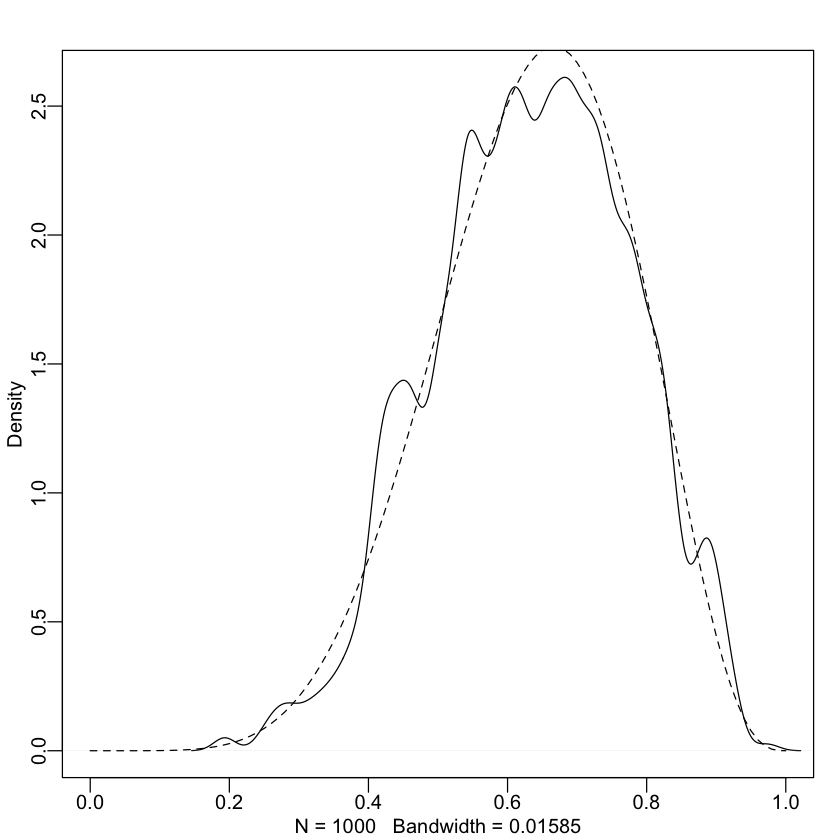

In [11]:
dens( p , xlim=c(0,1) )
curve( dbeta( x, W+1, L+1), lty=2, add=TRUE)